In [143]:
from sklearn.datasets import fetch_openml
data = fetch_openml("mnist_784")

In [144]:
print(data.data.shape)
print(data.target.shape)

(70000, 784)
(70000,)


In [145]:
target = [int(x) for x in data.target]

In [146]:
X_train, X_test = data.data[:60000], data.data[60000:]
y_train, y_test = target[:60000], target[60000:]

In [147]:
X_train.shape

(60000, 784)

Задание 1:

Выберем случайные N = {10, 20, 100} признаков:

In [148]:
import random
def random_indexes(n):
  l = list(range(0, X_train.shape[1]))
  random.shuffle(l)
  return l[:n]

index10 = random_indexes(10)
index20 = random_indexes(20)
index100 = random_indexes(100)

In [149]:
print(index10)
print(index20)
print(index100)


[698, 435, 233, 66, 258, 580, 760, 683, 261, 487]
[351, 113, 60, 458, 578, 314, 278, 331, 57, 607, 685, 327, 582, 5, 490, 213, 187, 366, 583, 672]
[386, 576, 350, 595, 759, 182, 296, 184, 352, 530, 45, 88, 220, 109, 458, 668, 107, 40, 165, 276, 547, 760, 68, 288, 44, 237, 597, 671, 433, 739, 639, 74, 298, 116, 529, 778, 407, 166, 485, 6, 128, 565, 277, 105, 271, 772, 239, 10, 571, 594, 225, 520, 179, 681, 752, 281, 586, 559, 13, 588, 209, 223, 181, 685, 159, 563, 617, 20, 57, 756, 515, 212, 167, 657, 592, 270, 457, 203, 646, 275, 264, 672, 757, 72, 447, 545, 602, 777, 372, 211, 52, 365, 49, 171, 241, 59, 325, 130, 245, 266]


In [150]:
X_train.shape

(60000, 784)

In [151]:
from knn.classification import KNNClassifier, BatchedMixin, BatchedKNNClassifier
import time
indexes = [index10, index20, index100]
algorithms = ['my_own', 'brute', 'ball_tree', 'kd_tree']
weights = ['uniform', 'distance']

batch_size = 100
arr = []
for index in indexes:
  answ = {}
  for algorithm in algorithms:
    for weight in weights:
      clf = BatchedKNNClassifier(n_neighbors=5, algorithm=algorithm, metric='euclidean', weights=weight)
      clf.set_batch_size(batch_size)
      clf.fit(X_train[:, index], y_train)
      start_time = time.time()
      clf.kneighbors(X_test[:, index])
      answ[algorithm + '_' + weight + '_' + str(len(index))] = time.time() - start_time
  arr.append(answ)  

Рассмотрим результаты, для 10-ти признаков:

In [152]:
from tabulate import tabulate
print(tabulate(arr[0].items(), headers=['NAME', 'TIME'], tablefmt="grid"))


+-----------------------+----------+
| NAME                  |     TIME |
+=======================+==========+
| my_own_uniform_10     | 14.7178  |
+-----------------------+----------+
| my_own_distance_10    | 14.737   |
+-----------------------+----------+
| brute_uniform_10      | 13.6163  |
+-----------------------+----------+
| brute_distance_10     | 13.5837  |
+-----------------------+----------+
| ball_tree_uniform_10  |  8.90145 |
+-----------------------+----------+
| ball_tree_distance_10 |  6.35399 |
+-----------------------+----------+
| kd_tree_uniform_10    |  1.78698 |
+-----------------------+----------+
| kd_tree_distance_10   |  1.87779 |
+-----------------------+----------+


Для 20-ти признаков:

In [153]:
print(tabulate(arr[1].items(), headers=['NAME', 'TIME'], tablefmt="grid"))

+-----------------------+----------+
| NAME                  |     TIME |
+=======================+==========+
| my_own_uniform_20     | 14.3729  |
+-----------------------+----------+
| my_own_distance_20    | 14.7591  |
+-----------------------+----------+
| brute_uniform_20      | 13.3171  |
+-----------------------+----------+
| brute_distance_20     | 13.4408  |
+-----------------------+----------+
| ball_tree_uniform_20  | 35.3314  |
+-----------------------+----------+
| ball_tree_distance_20 | 33.3802  |
+-----------------------+----------+
| kd_tree_uniform_20    |  4.88028 |
+-----------------------+----------+
| kd_tree_distance_20   |  4.87031 |
+-----------------------+----------+


Для 100-ни признаков:

In [155]:
print(tabulate(arr[2].items(), headers=['NAME', 'TIME'], tablefmt="grid"))

+------------------------+----------+
| NAME                   |     TIME |
+========================+==========+
| my_own_uniform_100     |  19.6952 |
+------------------------+----------+
| my_own_distance_100    |  19.7958 |
+------------------------+----------+
| brute_uniform_100      |  18.8098 |
+------------------------+----------+
| brute_distance_100     |  18.8304 |
+------------------------+----------+
| ball_tree_uniform_100  | 211.766  |
+------------------------+----------+
| ball_tree_distance_100 | 211.221  |
+------------------------+----------+
| kd_tree_uniform_100    | 174.2    |
+------------------------+----------+
| kd_tree_distance_100   | 172.709  |
+------------------------+----------+


Задание номер 2:

In [125]:
import numpy as np
k_list = np.arange(1, 11, 1)
print(k_list)

[ 1  2  3  4  5  6  7  8  9 10]


In [126]:
small_data = data.data[:1000]
smal_target = target[:1000]

In [127]:
from sklearn.model_selection import KFold
from knn.model_selection import knn_cross_val_score
import time

weight_arr = {}
weights = ['uniform', 'distance']
metrics = ['euclidean', 'cosine']
for weight in weights:
  metric_arr = {}
  for metric in metrics:
    time_arr = {}
    acc_arr = {}
    for k in k_list:
      cv = KFold(n_splits=3)
      start_time = time.time()
      scores_pred = knn_cross_val_score(data.data, target, [k], scoring = 'accuracy', cv=cv, metric=metric, weights=weight, algorithm='my_own')
      time_arr[k] = (time.time() - start_time)
      acc_arr[k] = (np.mean(scores_pred[k]))
    metric_arr[metric] =  (time_arr, acc_arr)
  weight_arr[weight] = metric_arr  

In [128]:
time1 = weight_arr['uniform']['euclidean'][0].values()
time2 = weight_arr['uniform']['cosine'][0].values()


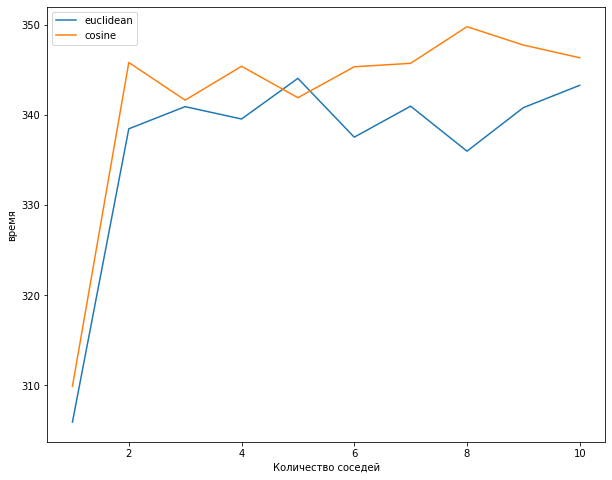

In [129]:
import matplotlib.pyplot as plt
import math
fig, ax = plt.subplots()
ax.plot(k_list, list(time1), label = 'euclidean')
ax.plot(k_list, list(time2), label = 'cosine')
ax.legend()

fig.set_figheight(8)
fig.set_figwidth(10)
ax.set_xlabel('Количество соседей')
ax.set_ylabel('время')
plt.show()

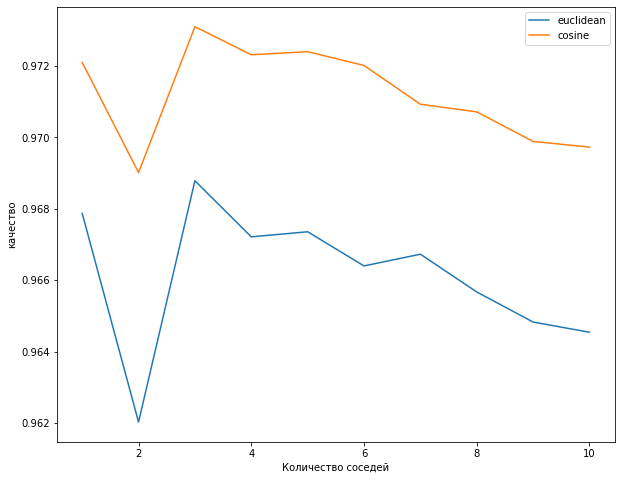

In [130]:
acc1 = weight_arr['uniform']['euclidean'][1].values()
acc2 = weight_arr['uniform']['cosine'][1].values()
fig, ax = plt.subplots()
ax.plot(k_list, list(acc1), label = 'euclidean')
ax.plot(k_list, list(acc2), label = 'cosine')
ax.legend()

fig.set_figheight(8)
fig.set_figwidth(10)
ax.set_xlabel('Количество соседей')
ax.set_ylabel('качество')
plt.show()


Задание 3:

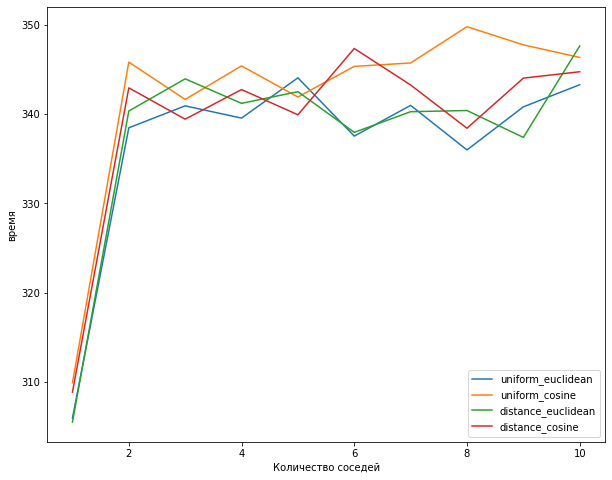

In [131]:
time1 = weight_arr['uniform']['euclidean'][0].values()
time2 = weight_arr['uniform']['cosine'][0].values()
time3 = weight_arr['distance']['euclidean'][0].values()
time4 = weight_arr['distance']['cosine'][0].values()

fig, ax = plt.subplots()
ax.plot(k_list, list(time1), label = 'uniform_euclidean')
ax.plot(k_list, list(time2), label = 'uniform_cosine')
ax.plot(k_list, list(time3), label = 'distance_euclidean')
ax.plot(k_list, list(time4), label = 'distance_cosine')

ax.legend()

fig.set_figheight(8)
fig.set_figwidth(10)
ax.set_xlabel('Количество соседей')
ax.set_ylabel('время')
plt.show()

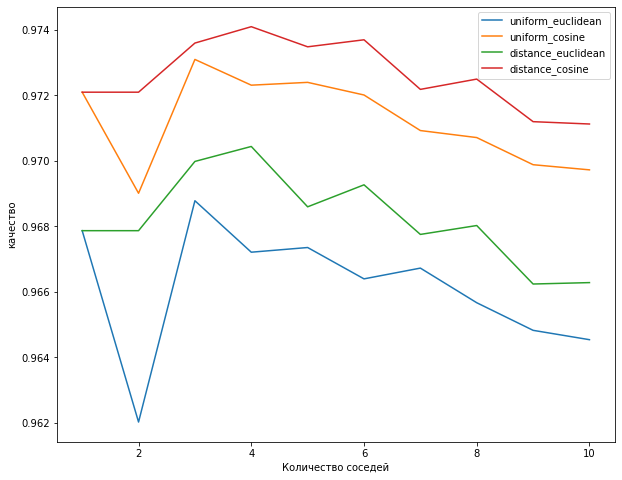

In [132]:
acc1 = weight_arr['uniform']['euclidean'][1].values()
acc2 = weight_arr['uniform']['cosine'][1].values()
acc3 = weight_arr['distance']['euclidean'][1].values()
acc4 = weight_arr['distance']['cosine'][1].values()

fig, ax = plt.subplots()
ax.plot(k_list, list(acc1), label = 'uniform_euclidean')
ax.plot(k_list, list(acc2), label = 'uniform_cosine')
ax.plot(k_list, list(acc3), label = 'distance_euclidean')
ax.plot(k_list, list(acc4), label = 'distance_cosine')

ax.legend()

fig.set_figheight(8)
fig.set_figwidth(10)
ax.set_xlabel('Количество соседей')
ax.set_ylabel('качество')
plt.show()

Как мы видим из приведенных графиков лучшее качество достигается на metric='cosine', weights='distance', n_neighbors=4

Задание номер 4:

In [133]:
from sklearn.metrics import accuracy_score

clf = BatchedKNNClassifier(n_neighbors=4, algorithm='my_own', metric='cosine', weights='distance')
clf.set_batch_size(1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9752


In [134]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9752


In [135]:
cv = KFold(n_splits=3)
scores_pred = knn_cross_val_score(data.data, target, [4], scoring = 'accuracy', cv=cv, metric='cosine', weights='distance', algorithm='my_own')


In [136]:
print("качество модели :",accuracy)
print("качество модели на кросс-валидаци: ",np.mean(scores_pred[4]))

качество модели : 0.9752
качество модели на кросс-валидаци:  0.9740999801937931


Как мы видим качество модели лучше чем качество на кросс-валидации.

Рассмотрим матрицу ошибок:

In [137]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)

In [138]:
print(matrix)

[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1129    3    1    0    0    2    0    0    0]
 [   8    0 1009    1    1    0    0    8    5    0]
 [   0    1    3  976    1   12    0    4    9    4]
 [   2    1    0    0  946    0    6    2    0   25]
 [   4    0    0    9    1  863    7    1    4    3]
 [   3    3    0    0    1    3  948    0    0    0]
 [   2   10    4    0    1    0    0  998    0   13]
 [   7    1    2    9    3    3    5    4  936    4]
 [   7    7    2    5    7    3    1    4    3  970]]


Как мы видим самое большое количество ошибок, а именно 25 возникает при прогнозировании модели 9 вместо 4. Это вполне логично, ведь 4 и 9 имеют общие черты при написании. Так же модель ошибается при прогнозировании 7, она прогнозирует 9 (13 раз) и при прогнозировании 3 (прогнозирует 5 - 12 раз). В целом модель работает хорошо и показывает хороший результат.  

Проанализируем цифры, на которых модель ошибается:

In [139]:
def plot_mnist(images, N, M):
    f, axarr = plt.subplots(N, M, figsize=(8, 8))
    k = 0
    for i in range(N):
        for j in range(M):
            # cmap = 'gray_r', чтобы черный фон не выжигал глаза
            axarr[i, j].imshow(images[k], cmap='gray_r')
            # axarr[i, j].set_title(labels[m * i + j])
            axarr[i, j].tick_params(
                axis='both', which='both',
                bottom='off', top='off', right='off', left='off',
                labelbottom='off', labelleft='off', length=0
            )
            axarr[i, j].set_xticks([])
            axarr[i, j].set_yticks([])
            # axarr[i, j].axis('off')
            k += 1
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

Рассмотрим когда модель неверно классифицирует 4-ку:

In [140]:
mass = []
labels = []
for i in range(len(y_test)):
  if(y_test[i] == 4):
    if(y_test[i]!=y_pred[i]):
      mass.append(X_test[i])
      labels.append(y_pred[i])

In [141]:
mass = np.array(mass)
print(mass.shape)

(36, 784)


(36, 28, 28)


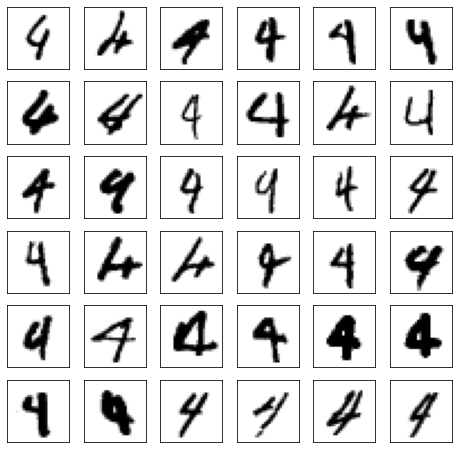

[9.0, 6.0, 9.0, 9.0, 9.0, 9.0, 6.0, 9.0, 9.0, 9.0, 6.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 6.0, 6.0, 9.0, 9.0, 9.0, 9.0, 7.0, 0.0, 9.0, 9.0, 6.0, 9.0, 9.0, 9.0, 7.0, 0.0, 1.0]


In [142]:
N, M = 6, 6
batch_size, offset = 100, 0

images = mass.reshape(-1, 28, 28)
print(images.shape)

images_ = images[offset:offset + N * M]
plot_mnist(images_, N, M)
print(labels)

Как мы видим в большинстве цифры нарисованы неаккуратно и в некоторых случаях даже человек с трудом смог бы понять что это за число. Видно, что есть много сходств с написанием цифры 9.